In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [2]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = './caffe/'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

In [3]:
caffe.set_device(0)  # if we have multiple GPUs, pick the first one
caffe.set_mode_gpu()

model_def = './caffe/models/resnet/ResNet-152-deploy.prototxt'
model_weights = './caffe/models/resnet/ResNet-152-model.caffemodel'

#model_def = './caffe/models/vgg-19/VGG_ILSVRC_19_layers_deploy.prototxt'
#model_weights = './caffe/models/vgg-19/VGG_ILSVRC_19_layers.caffemodel'

#model_def = caffe_root + 'models/bvlc_googlenet/deploy.prototxt'
#model_weights = caffe_root + 'models/googlenet/imagenet_googlenet.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [4]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


In [23]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
#net.blobs['data'].reshape(50,        # batch size
#                          3,         # 3-channel (BGR) images
#                          227, 227)  # image size is 227x227

In [7]:
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)
    
#for layer_name, param in net.params.iteritems():
#    print layer_name + '\t' + str(param[0].data.shape)

data	(1, 3, 224, 224)
conv1	(1, 64, 112, 112)
pool1	(1, 64, 56, 56)
pool1_pool1_0_split_0	(1, 64, 56, 56)
pool1_pool1_0_split_1	(1, 64, 56, 56)
res2a_branch1	(1, 256, 56, 56)
res2a_branch2a	(1, 64, 56, 56)
res2a_branch2b	(1, 64, 56, 56)
res2a_branch2c	(1, 256, 56, 56)
res2a	(1, 256, 56, 56)
res2a_res2a_relu_0_split_0	(1, 256, 56, 56)
res2a_res2a_relu_0_split_1	(1, 256, 56, 56)
res2b_branch2a	(1, 64, 56, 56)
res2b_branch2b	(1, 64, 56, 56)
res2b_branch2c	(1, 256, 56, 56)
res2b	(1, 256, 56, 56)
res2b_res2b_relu_0_split_0	(1, 256, 56, 56)
res2b_res2b_relu_0_split_1	(1, 256, 56, 56)
res2c_branch2a	(1, 64, 56, 56)
res2c_branch2b	(1, 64, 56, 56)
res2c_branch2c	(1, 256, 56, 56)
res2c	(1, 256, 56, 56)
res2c_res2c_relu_0_split_0	(1, 256, 56, 56)
res2c_res2c_relu_0_split_1	(1, 256, 56, 56)
res3a_branch1	(1, 512, 28, 28)
res3a_branch2a	(1, 128, 28, 28)
res3a_branch2b	(1, 128, 28, 28)
res3a_branch2c	(1, 512, 28, 28)
res3a	(1, 512, 28, 28)
res3a_res3a_relu_0_split_0	(1, 512, 28, 28)
res3a_res3a_relu

In [10]:
import os, csv

path = "/home/soyeon1771/SNFtools/Div400/testset/testset_keywordsGPS/"
for dir in os.listdir(path+'img/'):
    print dir
    f = open(path+'descvis/img/'+dir+' Res152net-Caffe.csv', 'wb')
    for file in os.listdir(path+'img/'+dir):
        fname = os.path.splitext(file)[0]
        imfile = path+'img/'+dir+'/'+file
        image = caffe.io.load_image(imfile.rstrip('\n'))
        transformed_image = transformer.preprocess('data', image)

        # copy the image data into the memory allocated for the net
        net.blobs['data'].data[...] = transformed_image

        ### perform classification
        output = net.forward()
        feat = net.blobs['pool5'].data[0].squeeze()
        
        
        # write to csv
        feat = feat.astype(object)
        feat = np.insert(feat,0,fname)
                
        writer = csv.writer(f, delimiter=',',quoting=csv.QUOTE_NONE)
        writer.writerow(feat)
    f.close()           
                

        

Mausoleum of Hadrian
Trajan's Column
Fox Theatre
Pointe de Pen-Hir
The Taj Mahal in Agra
Castel Nuovo or Maschio Angioino
Great Pyramid of Giza
Uxmal
Puerta de Alcala
Bok Tower Gardens
Golden Gate Bridge in San Francisco
Statue of King Charles I
Giotto's Campanile
Hagia Sophia in Istanbul
Columbus Monument
Place de la Republique
Statue of Liberty
Palacio de la Magdalena
Tower of Belem
Fatehpur Sikri
Chichen Itza
Teotihuacan
Chicago Board of Trade Building
Eiffel Tower
Tour Montparnasse
Arch of Titus
Capitole de Toulouse
Piazza Vittorio Veneto
Place des Vosges
Moulin Rouge
Plantin-Moretus Museum
Statue of George IV
Berlin Cathedral
Gateway Arch
Ara Pacis
Valle de los Caidos
Wartburg Castle
Machu Picchu
Conciergerie
Rialto Bridge
Palazzo Madama
Saint Mark's Basilica
Brandenburg Gate in Berlin
Qutb complex
Saint-Jacques Tower
Xochicalco
Atomium in Brussels
Basilica di San Zeno
La Sainte Chapelle
Luxembourg Palace
Khajuraho Group of Monuments
Place de la Concorde
Jin Mao tower
Arch of Cons

(2048,)
[ 0.06171809  1.32841682  0.16252187 ...,  2.36914492  1.67700672  0.        ]


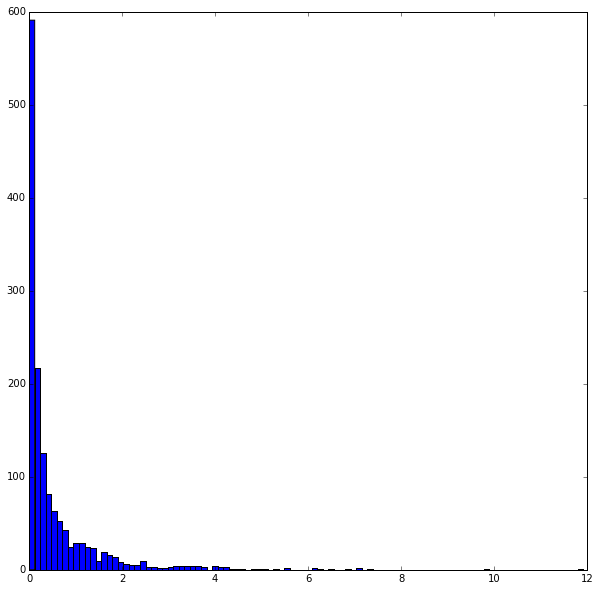

In [11]:
feat = net.blobs['pool5'].data[0].squeeze()
print feat.shape
print feat
_ = plt.hist(feat.flat[feat.flat > 0], bins=100)